In [1]:
# Dependencies
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# import dependency to save summary stat as image
import dataframe_image as dfi

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Show the tables in the hawaii.sqlite db
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6).all()
# june_temps

In [6]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]
june_temps_list[:5]

[78.0, 76.0, 78.0, 76.0, 77.0]

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps_list, columns=['June Temps'])
june_temps_df

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0
...,...
1695,79.0
1696,74.0
1697,74.0
1698,76.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_ss = june_temps_df.describe()

# save summary stat display as an image
dfi.export(june_temp_ss, "Images/june_temp_summary_stats.png")
june_temp_ss

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]
dec_temps_list[:5]

[76.0, 74.0, 74.0, 64.0, 64.0]

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])
dec_temps_df

,December Temps
0,76.0
1,74.0
2,74.0
3,64.0
4,64.0
...,...
1512,71.0
1513,71.0
1514,69.0
1515,65.0


In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_ss = dec_temps_df.describe()

# save summary stat display as an image
dfi.export(dec_temp_ss, "Images/dec_temp_summary_stats.png")
dec_temp_ss

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## Additional visualizations for ReadMe file

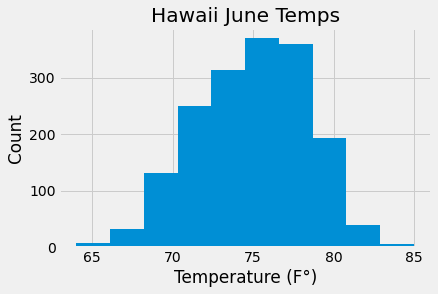

In [13]:
# Visualization for june df
june_temps_df.hist()
plt.tight_layout()
plt.title("Hawaii June Temps")
plt.xlabel('Temperature (F°)')
plt.ylabel("Count")
plt.show()

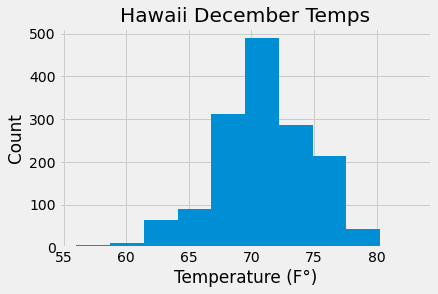

In [14]:
# Visualization for dec df
dec_temps_df.hist()
plt.tight_layout()
plt.title('Hawaii December Temps')
plt.xlabel('Temperature (F°)')
plt.ylabel("Count")
plt.show()

## D3 - Additional Queries